### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")


# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
missing_values = reviews.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing values in the DataFrame.")
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform', 'education'], axis=1)

# View column names.
print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master'

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'income_per_year (k£)', 'review': 'full_review', 'summary': 'summary_of_review'})


# View column names.
print(reviews.head())

   gender  age  income_per_year (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18                 12.30                      39             210   
1    Male   23                 12.30                      81             524   
2  Female   22                 13.12                       6              40   
3  Female   25                 13.12                      77             562   
4  Female   33                 13.94                      40             366   

   product                                        full_review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                   summary_of_review  
0  The fact that 50% of this space is wasted on a...  
1  Another worthle

## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
file_name = 'reviews.csv'
reviews.to_csv(file_name, index=False)

In [9]:
# Import new CSV file with Pandas.
updated_reviews = pd.read_csv("reviews.csv")


# View DataFrame.
updated_reviews

,gender,age,income_per_year (k£),spending_score (1-100),loyalty_points,product,full_review,summary_of_review
0,Male,18,12.30,39,210,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.92e-263
Time:                        01:22:02   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

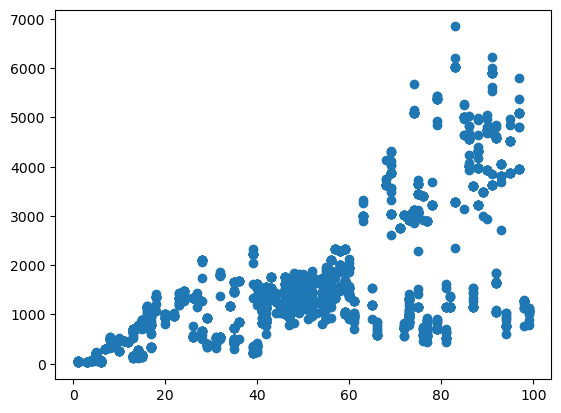

In [10]:
# Independent variable.
x = updated_reviews['spending_score (1-100)'] 

# Dependent variable.
y = updated_reviews['loyalty_points'] 

# Checking for linearity.
plt.scatter(x, y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = updated_reviews).fit()

# Print the regression table.
test.summary() 

The slope is **significant** as the probability of the *t*-value is less than 0.05 – it is 0.00.

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * updated_reviews['spending_score (1-100)']

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score (1-100), Length: 2000, dtype: float64

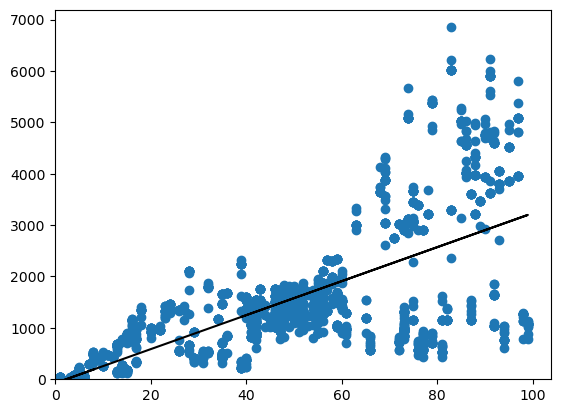

In [13]:
# Plot the data points.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.43e-209
Time:                        01:22:02   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

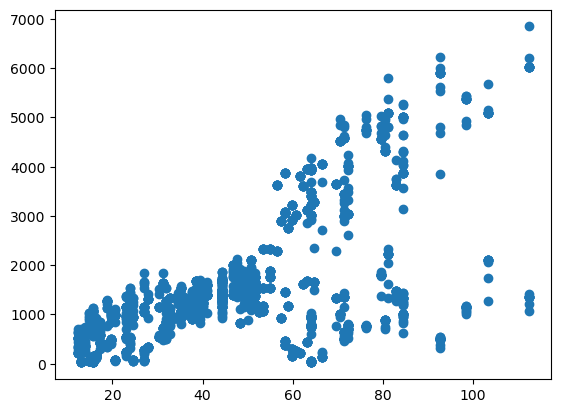

In [14]:
# Independent variable.
x = updated_reviews['income_per_year (k£)'] 

# Dependent variable.
y = updated_reviews['loyalty_points'] 

# Checking for linearity.
plt.scatter(x, y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = updated_reviews).fit()

# Print the regression table.
test.summary() 

The slope is **significant** as the probability of the *t*-value is less than 0.05 – it is 0.00.

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * updated_reviews['income_per_year (k£)']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: income_per_year (k£), Length: 2000, dtype: float64

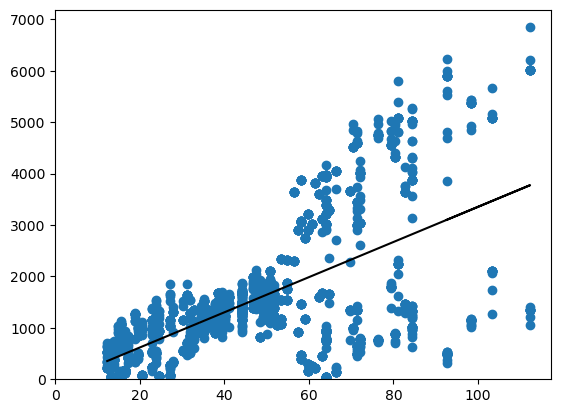

In [17]:
# Plot the data points.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0577
Time:                        01:22:02   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

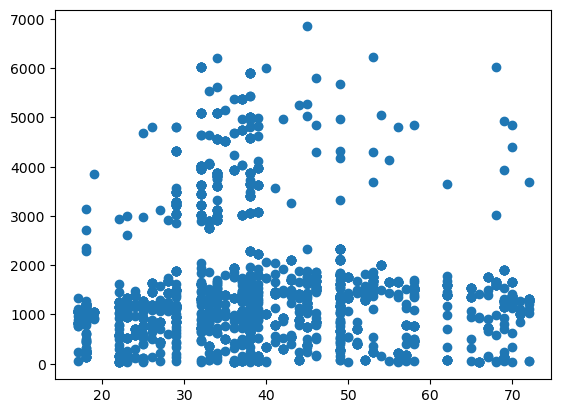

In [18]:
# Independent variable.
x = updated_reviews['age'] 

# Dependent variable.
y = updated_reviews['loyalty_points'] 

# Checking for linearity.
plt.scatter(x, y)

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = updated_reviews).fit()

# Print the regression table.
test.summary() 

The slope is **not significant** as the probability of the *t*-value is more than 0.05 – it is 0.058.

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + -4.0128 * updated_reviews['age']

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

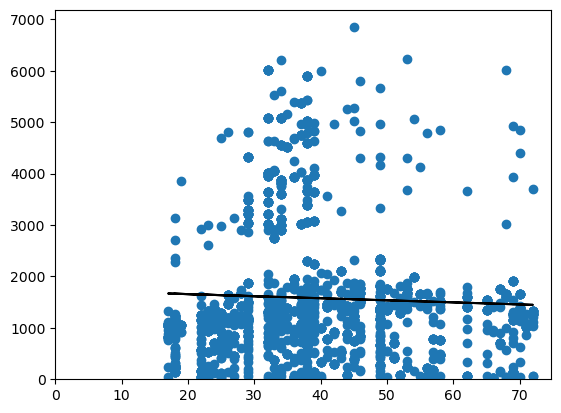

In [21]:
# Plot the data points.
plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [22]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [23]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv("reviews.csv")

# View DataFrame.
df2

,gender,age,income_per_year (k£),spending_score (1-100),loyalty_points,product,full_review,summary_of_review
0,Male,18,12.30,39,210,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,1031,fun game!,Four Stars


In [24]:
# Drop unnecessary columns.
df2 = df2.drop(['gender', 'age', 'loyalty_points', 'product', 'full_review', 'summary_of_review'], axis=1)

# View DataFrame.
df2

,income_per_year (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [25]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income_per_year (k£)    2000 non-null   float64
 1   spending_score (1-100)  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [26]:
# Descriptive statistics.
df2.describe()

,income_per_year (k£),spending_score (1-100)
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='income_per_year (k£)', ylabel='spending_score (1-100)'>

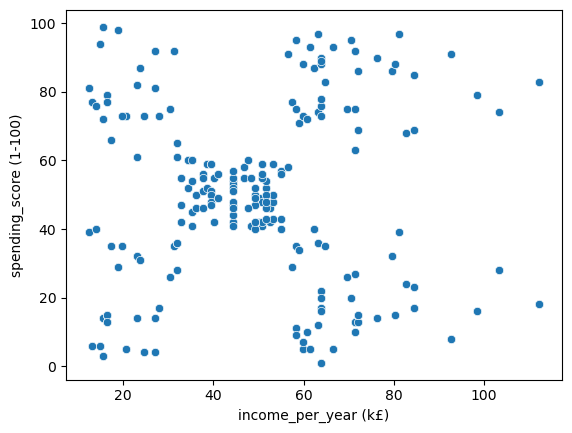

In [27]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'income_per_year (k£)',
                y = 'spending_score (1-100)',
                data = df2)

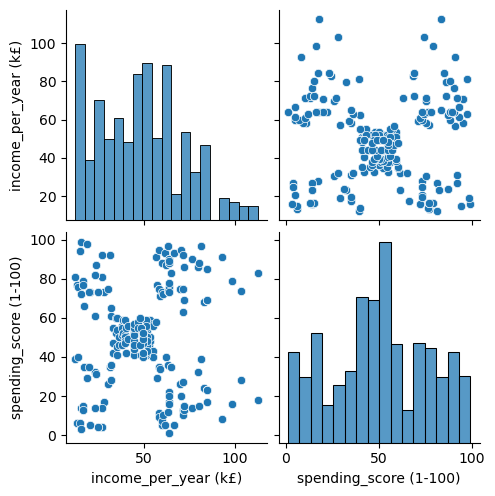

In [28]:
# Create a pairplot with Seaborn.
sns.pairplot(df2)

## 3. Elbow and silhoutte methods

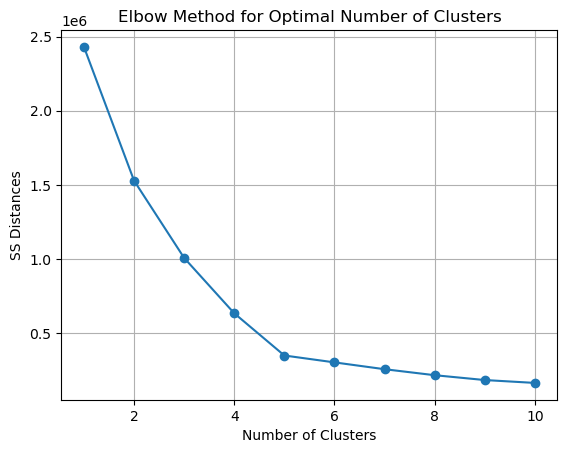

In [29]:
# Determine the number of clusters: Elbow method.

X = df2[['income_per_year (k£)', 'spending_score (1-100)']]

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for each number of clusters
ss = []

# Specify the range of cluster numbers to try
num_clusters_range = range(1, 11)

# Fit K-means clustering for each number of clusters and calculate WCSS
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(num_clusters_range,
         ss,
         marker='o')
# Adding labels and titles.
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SS Distances')
plt.grid(True)
plt.show()

The *Elbow* method indicates that the **optimal number of clusters is 5**, as this is where the "elbow" is.

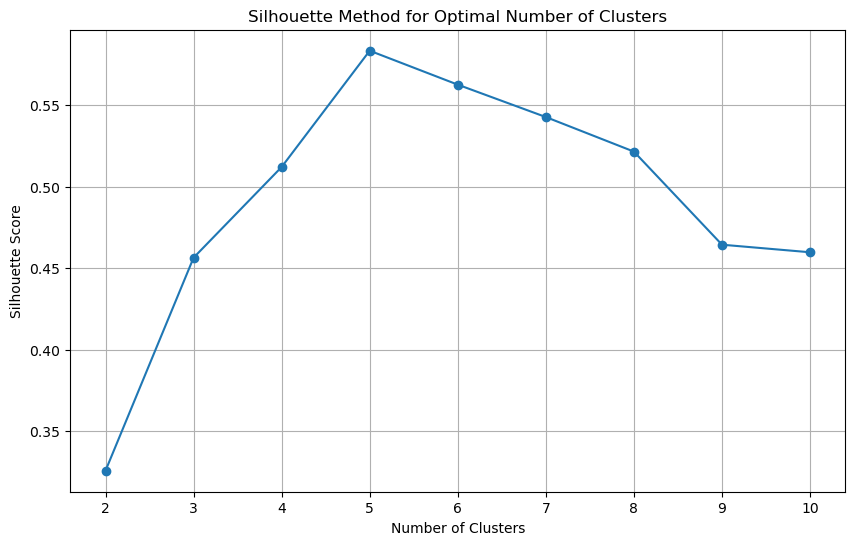

In [30]:
# Determine the number of clusters: Silhouette method.
X = df2[['income_per_year (k£)', 'spending_score (1-100)']]

# Initialize an empty list to store silhouette scores for different number of clusters
silhouette_scores = []

# Specify the range of cluster numbers to try
num_clusters_range = range(2, 11)

# Calculate silhouette score for each number of clusters
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

The *Silhouette* method indicates that the **optimal number of clusters is also 5**, as this is the number with the highest silhouette score.

## 4. Evaluate k-means model at different values of *k*

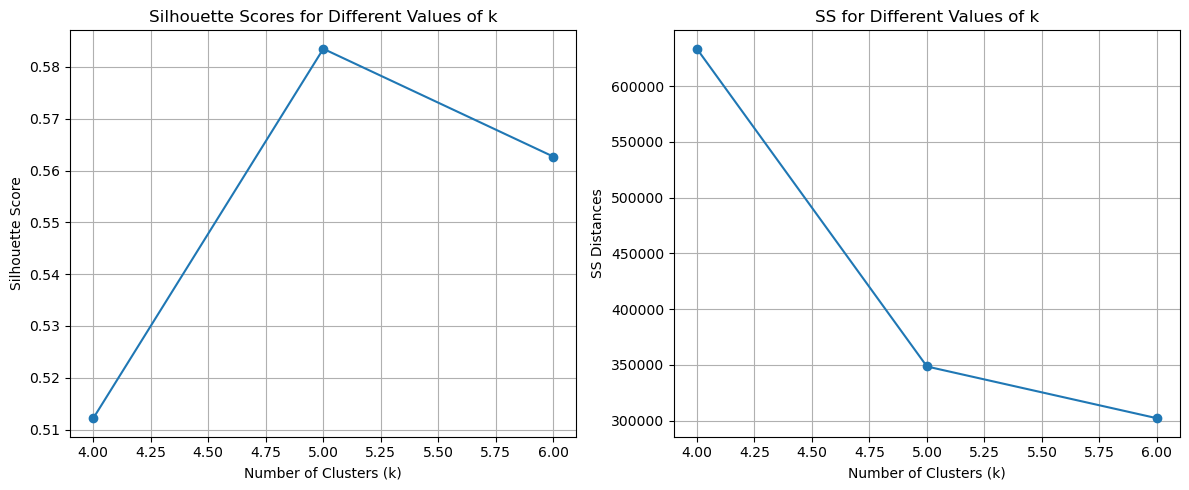

In [31]:
X = df2[['income_per_year (k£)', 'spending_score (1-100)']]

# Specify the values of k to evaluate
k_values = [4, 5, 6]

# Initialize lists to store evaluation metrics
silhouette_scores = []
ss = []

# Fit K-means and evaluate for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate SS distances
    ss.append(kmeans.inertia_)

# Plot evaluation metrics
plt.figure(figsize=(12, 5))

# Plot silhouette scores
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot SS Distances
plt.subplot(1, 2, 2)
plt.plot(k_values, ss, marker='o', linestyle='-')
plt.title('SS for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SS Distances')
plt.grid(True)

plt.tight_layout()
plt.show()

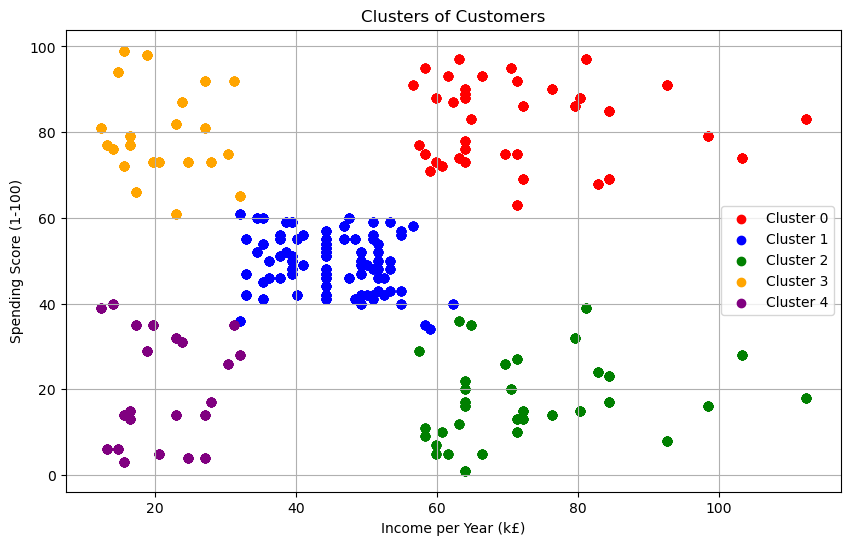

In [32]:
# Prepare the data
X = df2[['income_per_year (k£)', 'spending_score (1-100)']]

# Fit K-means with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df2['cluster'] = cluster_labels

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster with different color
for cluster, color in zip(range(5), colors):
    cluster_data = df2[df2['cluster'] == cluster]
    plt.scatter(cluster_data['income_per_year (k£)'], cluster_data['spending_score (1-100)'], label=f'Cluster {cluster}', color=color)

plt.title('Clusters of Customers')
plt.xlabel('Income per Year (k£)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import string

nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/pmtguest/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pmtguest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Load the data set as df3.
df3 = pd.read_csv("turtle_reviews.csv")

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [37]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [38]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']].copy()

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [39]:
# Determine if there are any missing values.
missing_values = reviews.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing values in the DataFrame.")
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [40]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower()

In [41]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower()

In [42]:
df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it whe...,super fun
1997,great game for all.........\nkeeps the mind ni...,great game
1998,fun game!,four stars


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [43]:
# Replace all the punctuations in review column.
# Defining a function to remove punctuation
def remove_punctuation(text):
    return ''.join([char if char not in string.punctuation else ' ' for char in text])

# Applying the function to the 'review' column
df3['review'] = df3['review'].apply(remove_punctuation)

# Applying the function to the 'summary' column
df3['summary'] = df3['summary'].apply(remove_punctuation)

# View output.
print(df3)

                                                 review  \
0     when it comes to a dm s screen  the space on t...   
1     an open letter to galeforce9  \n\nyour unpaint...   
2     nice art  nice printing   why two panels are f...   
3     amazing buy  bought it as a gift for our new d...   
4     as my review of gf9 s previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages  with mom...   
1996  great game   did not think i would like it whe...   
1997  great game for all         \nkeeps the mind ni...   
1998                                          fun game    
1999  this game is fun  a lot like scrabble without ...   

                                                summary  
0     the fact that 50  of this space is wasted on a...  
1     another worthless dungeon master s screen from...  
2                       pretty  but also pretty useless  
3                                            five stars  
4

### 2c) Drop duplicates in both columns

In [44]:
# Drop duplicates in both columns.
df3['review'] = df3['review'].drop_duplicates()
df3['summary'] = df3['summary'].drop_duplicates()

# View DataFrame.
print(df3)

                                                 review  \
0     when it comes to a dm s screen  the space on t...   
1     an open letter to galeforce9  \n\nyour unpaint...   
2     nice art  nice printing   why two panels are f...   
3     amazing buy  bought it as a gift for our new d...   
4     as my review of gf9 s previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages  with mom...   
1996  great game   did not think i would like it whe...   
1997  great game for all         \nkeeps the mind ni...   
1998                                                NaN   
1999  this game is fun  a lot like scrabble without ...   

                                                summary  
0     the fact that 50  of this space is wasted on a...  
1     another worthless dungeon master s screen from...  
2                       pretty  but also pretty useless  
3                                            five stars  
4

## 3. Tokenise and create wordclouds

In [45]:
# Create new DataFrame (copy DataFrame).
df4 = df3.copy()

# View DataFrame.
df4

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it whe...,NaN
1997,great game for all \nkeeps the mind ni...,NaN
1998,NaN,NaN


In [46]:
# Apply tokenisation to both columns.
# Convert columns to string type
df4['review'] = df4['review'].astype(str)
df4['summary'] = df4['summary'].astype(str)

# Tokenize 'review' column
df4['review_tokens'] = df4['review'].apply(lambda x: word_tokenize(x))

# Tokenize 'summary' column
df4['summary_tokens'] = df4['summary'].apply(lambda x: word_tokenize(x))

# View DataFrame.
print(df4[['review_tokens', 'summary_tokens']])

                                          review_tokens  \
0     [when, it, comes, to, a, dm, s, screen, the, s...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9, s, previous, screens...   
...                                                 ...   
1995  [the, perfect, word, game, for, mixed, ages, w...   
1996  [great, game, did, not, think, i, would, like,...   
1997  [great, game, for, all, keeps, the, mind, nimble]   
1998                                              [nan]   
1999  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         summary_tokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, master, s, scree...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4

In [48]:
# Convert each list of tokens into a single string
review_tokens_combined = ' '.join(df4['review_tokens'].explode().astype(str))

# Review: Create a word cloud
review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_tokens_combined)

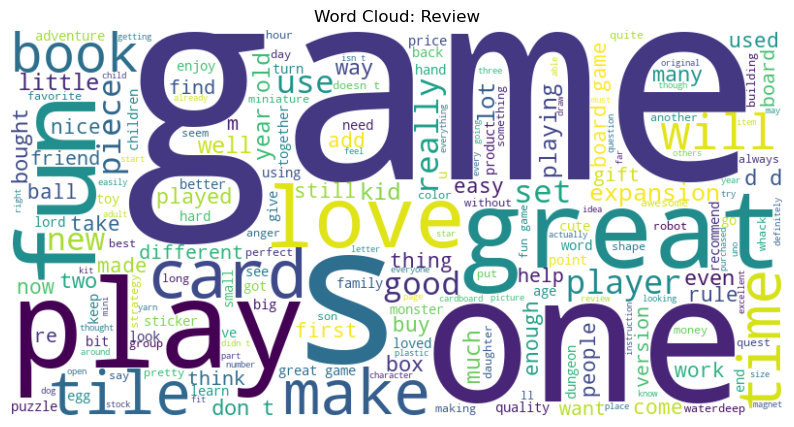

In [49]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(10, 6))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.title('Word Cloud: Review')
plt.axis('off')
plt.show()

In [52]:
# Convert each list of tokens into a single string
summary_tokens_combined = ' '.join(df4['summary_tokens'].explode().astype(str))

# Set the stopwords to ignore 'nan'
stopwords = {'nan'}

# Summary: Create a word cloud.
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_tokens_combined)

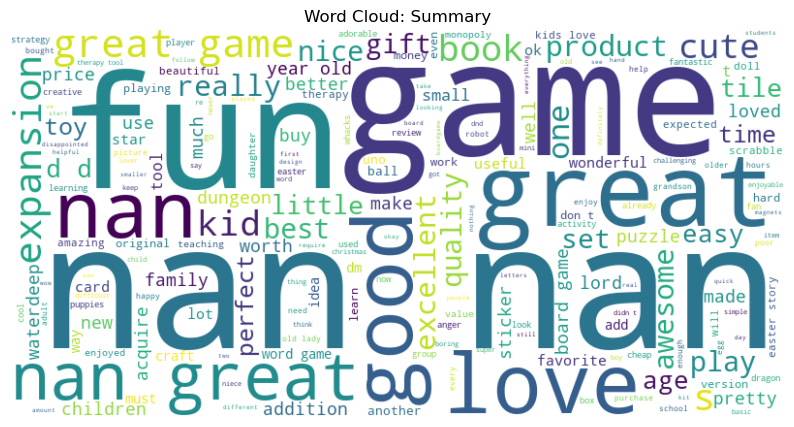

In [53]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10, 6))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.title('Word Cloud: Summary')
plt.axis('off')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [54]:
# Determine the frequency distribution.
# Combine all tokenized words into a single list
all_tokens = df4['review_tokens'].explode().tolist() + df4['summary_tokens'].explode().tolist()

# Create a frequency distribution
freq_dist = FreqDist(all_tokens)

# Print the most common words and their frequencies
print(freq_dist.most_common(10))

[('the', 5723), ('a', 3431), ('and', 3421), ('to', 3363), ('it', 2668), ('of', 2633), ('i', 2449), ('game', 1979), ('this', 1907), ('is', 1885)]


### 4b) Remove alphanumeric characters and stopwords

In [57]:
# Delete all the alpanum.
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove alphanumeric tokens and stopwords
    tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return tokens

# Clean 'review_tokens' and 'summary_tokens' columns
df4['review_tokens'] = df4['review'].apply(clean_text)
df4['summary_tokens'] = df4['summary'].apply(clean_text)

print(df4[['review_tokens', 'summary_tokens']])

                                          review_tokens  \
0     [comes, dm, screen, space, screen, absolute, p...   
1     [open, letter, unpainted, miniatures, bad, spe...   
2     [nice, art, nice, printing, two, panels, fille...   
3        [amazing, buy, bought, gift, new, dm, perfect]   
4     [review, previous, screens, completely, unnece...   
...                                                 ...   
1995  [perfect, word, game, mixed, ages, mom, perhap...   
1996  [great, game, think, would, like, first, recei...   
1997                 [great, game, keeps, mind, nimble]   
1998                                              [nan]   
1999  [game, fun, lot, like, scrabble, without, litt...   

                                         summary_tokens  
0     [fact, space, wasted, art, terribly, informati...  
1         [another, worthless, dungeon, master, screen]  
2                       [pretty, also, pretty, useless]  
3                                         [five, stars]  
4

### 4c) Create wordcloud without stopwords

In [61]:
# Function to clean text
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove alphanumeric tokens and stopwords
    tokens = [str(token).lower() for token in tokens if str(token).isalnum() and str(token).lower() not in stop_words]
    return tokens

# Clean 'review_tokens' and 'summary_tokens' columns
df4['review_tokens'] = df4['review'].apply(clean_text)
df4['summary_tokens'] = df4['summary'].apply(clean_text)

# Combine all tokenized words into a single list
all_tokens = [token for sublist in df4['review_tokens'].tolist() + df4['summary_tokens'].tolist() for token in sublist]

# Join the tokens into a single string
cleaned_text = ' '.join(all_tokens)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(cleaned_text)

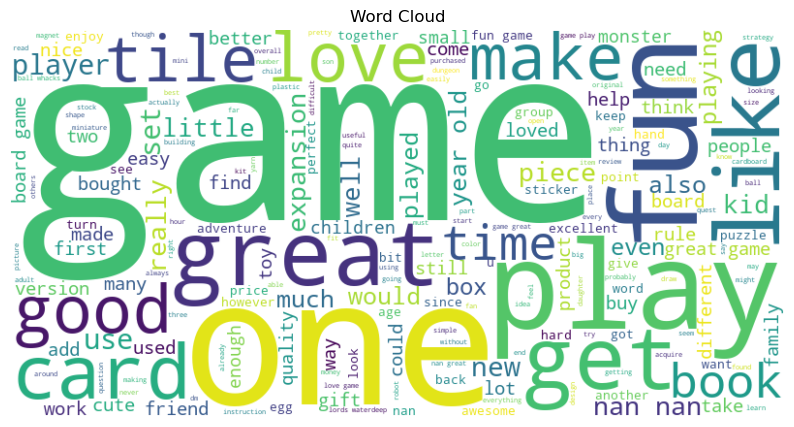

In [62]:
# Plot the wordcloud image.
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

### 4d) Identify 15 most common words and polarity

In [63]:
# Function to get polarity of a text
def get_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Combine all tokenized words into a single list
all_tokens = [token for sublist in df4['review_tokens'].tolist() + df4['summary_tokens'].tolist() for token in sublist]

# Get 15 most common words
most_common_words = Counter(all_tokens).most_common(15)

# Print 15 most common words
print("15 Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Calculate polarity of the entire text
cleaned_text = ' '.join(all_tokens)
text_polarity = get_polarity(cleaned_text)

# Print polarity of the text
print("\nPolarity of the Text:", text_polarity)

15 Most Common Words:
game: 1979
great: 838
fun: 737
nan: 637
one: 570
play: 535
like: 475
love: 401
good: 380
really: 349
get: 335
book: 320
tiles: 320
time: 316
cards: 312

Polarity of the Text: 0.14953974256043384


In [70]:
# Function to calculate sentiment score of each text
def calculate_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate sentiment scores for 'review' column
df4['review_sentiment_score'] = df4['review'].apply(calculate_sentiment_score)

# Calculate sentiment scores for 'summary' column
df4['summary_sentiment_score'] = df4['summary'].apply(calculate_sentiment_score)

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [64]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [65]:
# Determine polarity of both columns. 
df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# Print the polarity of each column
print("Polarity of 'review' column:")
print(df4['review_polarity'])

print("\nPolarity of 'summary' column:")
print(df4['summary_polarity'])

Polarity of 'review' column:
0      -0.036111
1       0.032684
2       0.115410
3       0.578788
4      -0.316667
          ...   
1995    0.168750
1996    0.158333
1997    0.200000
1998    0.000000
1999   -0.095833
Name: review_polarity, Length: 2000, dtype: float64

Polarity of 'summary' column:
0       0.15
1      -0.80
2       0.00
3       0.00
4       0.00
        ... 
1995    0.20
1996    0.00
1997    0.00
1998    0.00
1999    0.00
Name: summary_polarity, Length: 2000, dtype: float64


In [71]:
# View output
df4

,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity,review_sentiment_score,summary_sentiment_score
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[comes, dm, screen, space, screen, absolute, p...","[fact, 50, space, wasted, art, terribly, infor...",-0.036111,0.15,-0.036111,0.15
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[open, letter, galeforce9, unpainted, miniatur...","[another, worthless, dungeon, master, screen, ...",0.032684,-0.80,0.032684,-0.80
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]",0.115410,0.00,0.115410,0.00
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]",0.578788,0.00,0.578788,0.00
4,as my review of gf9 s previous screens these w...,money trap,"[review, gf9, previous, screens, completely, u...","[money, trap]",-0.316667,0.00,-0.316667,0.00
...,...,...,...,...,...,...,...,...
1995,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom,"[perfect, word, game, mixed, ages, mom, perhap...","[perfect, word, game, mixed, ages, mom]",0.168750,0.20,0.168750,0.20
1996,great game did not think i would like it whe...,nan,"[great, game, think, would, like, first, recei...",[nan],0.158333,0.00,0.158333,0.00
1997,great game for all \nkeeps the mind ni...,nan,"[great, game, keeps, mind, nimble]",[nan],0.200000,0.00,0.200000,0.00
1998,nan,nan,[nan],[nan],0.000000,0.00,0.000000,0.00


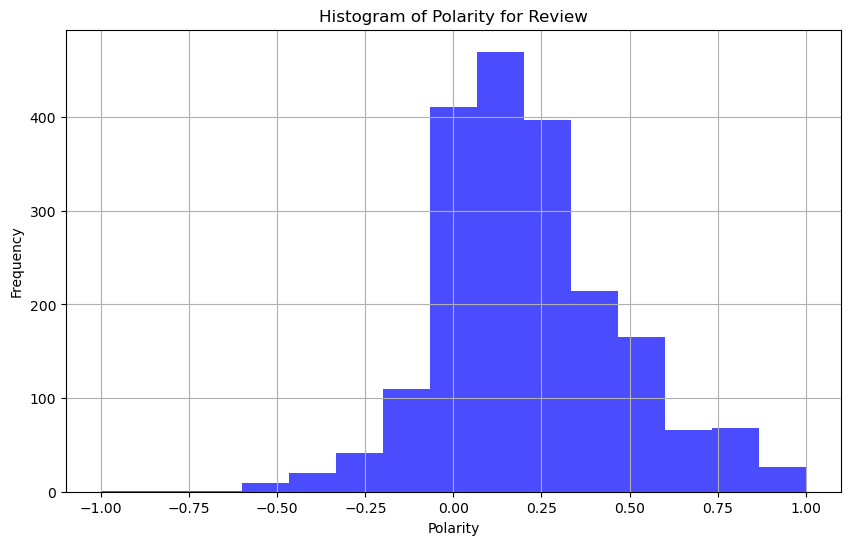

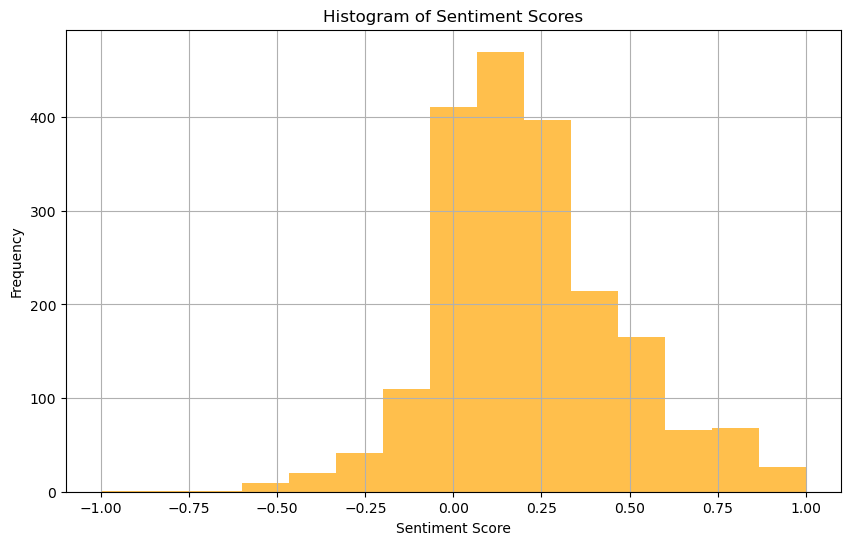

In [72]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10, 6))
plt.hist(df4['review_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Histogram of Polarity for Review')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of sentiment score
plt.figure(figsize=(10, 6))
plt.hist(df4['review_sentiment_score'], bins=15, color='orange', alpha=0.7)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

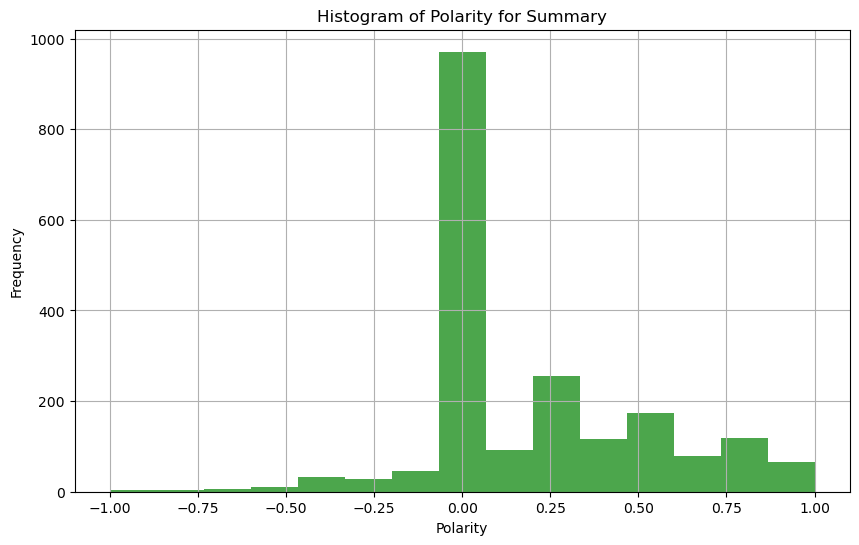

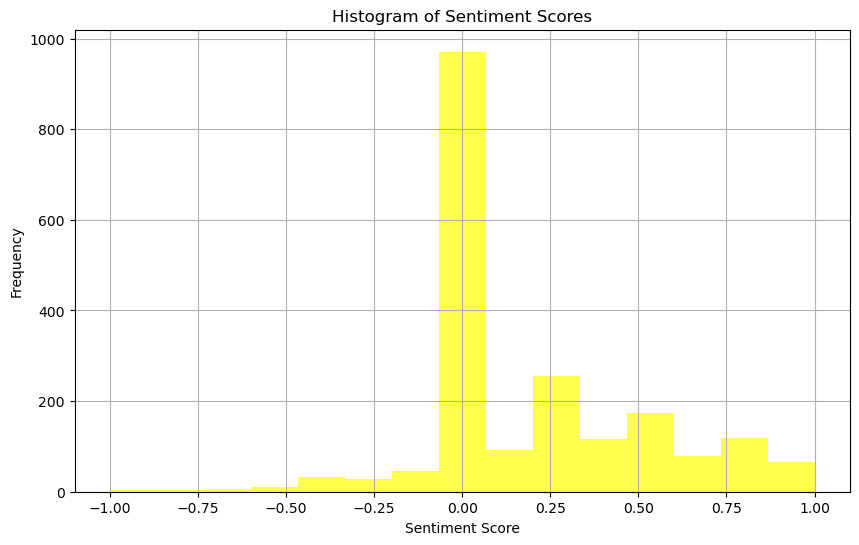

In [73]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10, 6))
plt.hist(df4['summary_polarity'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Polarity for Summary')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of sentiment score
plt.figure(figsize=(10, 6))
plt.hist(df4['summary_sentiment_score'], bins=15, color='yellow', alpha=0.7)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [74]:
# Top 20 negative reviews.
top_negative_reviews = df4.nsmallest(20, 'review_sentiment_score')['review']

# View output.
print(top_negative_reviews)

208     booo  unles you are patient know how to measur...
182                  incomplete kit   very disappointing 
527     used with anger management group and they like...
1804    i m sorry  i just find this product to be bori...
364     one of my staff will be using this game soon  ...
117     i bought this as a christmas gift for my grand...
227     this was a gift for my daughter   i found it d...
230                      i found the directions difficult
290                instructions are complicated to follow
301                                             difficult
1524                          expensive for what you get 
174     i sent this product to my granddaughter  the p...
538     i purchased this on the recommendation of two ...
306                  very hard complicated to make these 
427                      kids i work with like this game 
437     this game although it appears to be like uno a...
497     my son loves playing this game  it was recomme...
803           

In [75]:
# Top 20 negative summaries.
top_negative_summaries = df4.nsmallest(20, 'summary_sentiment_score')['summary']

# View output.
print(top_negative_summaries)

21                         the worst value i ve ever seen
208     boring unless you are a craft person which i a...
829                                                boring
1166    before this i hated running any rpg campaign d...
1       another worthless dungeon master s screen from...
144                                          disappointed
631                                         disappointed 
363     promotes anger instead of teaching calming met...
885            too bad  this is not what i was expecting 
890                         bad quality all made of paper
178     at age 31 i found these very difficult to make...
101                                      small and boring
518                                            mad dragon
805                                         disappointing
1015                                       disappointing 
1003    then you will find this board game to be dumb ...
364                                    anger control game
75            

In [76]:
# Top 20 positive reviews.
top_positive_reviews = df4.nlargest(20, 'review_sentiment_score')['review']

# View output.
print(top_positive_reviews)

7                              came in perfect condition 
165                                          awesome book
194                                          awesome gift
496     excellent activity for teaching self managemen...
524                        perfect  just what i ordered  
591                                     wonderful product
609                                   delightful product 
621     wonderful for my grandson to learn the resurre...
790                                              perfect 
933                                               awesome
1135                                         awesome set 
1168               best set  buy 2 if you have the means 
1177                awesome addition to my rpg gm system 
1301                                         it s awesome
1401    one of the best board games i played in along ...
1550    my daughter loves her stickers  awesome seller...
1609    this was perfect to go with the 7 bean bags   ...
1715          

In [77]:
# Top 20 positive summaries.
top_positive_summaries = df4.nlargest(20, 'summary_sentiment_score')['summary']

# View output.
print(top_positive_summaries)

6                                    best gm screen ever
28                                    wonderful designs 
32                                              perfect 
80     they re the perfect size to keep in the car or...
134                              perfect for preschooler
140               awesome sticker activity for the price
161                                      awesome book   
163                      he was very happy with his gift
187                                              awesome
210            awesome and well designed for 9 year olds
475                                           excellent 
543                                            excellent
548                               excellent therapy tool
580    the pigeon is the perfect addition to a school...
599                           best easter teaching tool 
647                                           wonderful 
651                all f the mudpuppy toys are wonderful
657                            

# 